---
layout: page
title: Interest Rates
---

In [1]:
""" import library and package dependencies """
from sys import path
path.insert(0, '../src')
import pandas as pd

from data_loader import get_csv_by_date
from chart_format import StandardChart, PercentileChart
from data_functions import Percentiles

The Housing Loan Lending Rates are set by the Reserve Bank of Australia and published monthly within five business days after month end.

In [2]:
""" Load data 
RBA monthly home lending rates from 1959
https://www.rba.gov.au/statistics/tables/frequency-statistical-releases.html
Rates are published around 11:30am 5 business days after the end of the month
"""
publish_date = pd.Timestamp.now() + pd.offsets.MonthBegin(-1) + pd.offsets.BDay(5)

csv_url = 'https://www.rba.gov.au/statistics/tables/csv/f5-data.csv'
local_file = '../data/f5-data.csv'

# First 10 rows are descriptive header rows
skip_rows = 10

df = get_csv_by_date(local_file, csv_url, publish_date, skip_rows)

In [3]:
""" Data Transformation """
df.dropna(subset=['Series ID'], inplace=True)

# FILRHLBVS = Financial Interest; Lending rates; Housing loans; Banks; Variable; Standard; Owner-occupier
data_column = 'FILRHLBVS'

# Series ID dates are in the format '31/01/1959'
df['Date'] = df['Series ID'].apply(lambda d: pd.to_datetime(d, format='%d/%m/%Y') )
df.set_index('Date', inplace=True)

last_index = df[data_column].last_valid_index()
# only include rows up to the last_index (drop the NaN rows at end of file)
df = df.loc[:last_index]


Australian interest rates ramped up from 6% in 1970 to a peak 17% in 1990 before dropping sharply back down to 10% in 1992.

Interest rates remained reasonably volatile with some sharp spikes and sudden drops, but overall trended down to 5% in 2020, before spiking back over 8% in 2023.

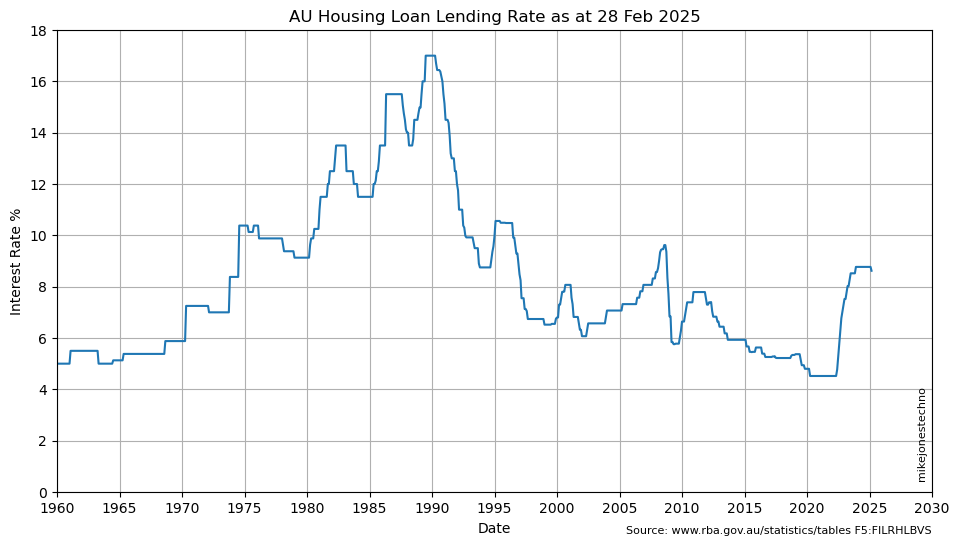

In [5]:
""" Show simple chart """

chart_params = {
    'chart_title': 'AU Housing Loan Lending Rate as at ' + last_index.strftime('%d %b %Y'), 
    'chart_source': 'Source: www.rba.gov.au/statistics/tables F5:' + data_column, 
    'y_label': 'Interest Rate %', 
    'y_ticks': 2,
    'x_label': 'Date', 
    'x_ticks': 5,
    'start_year': 1960,
    'data_column': data_column
}

standard_chart = StandardChart(**chart_params)
plt, colors = standard_chart.base_chart(df)

plt.plot(df.index, df[data_column], color=colors[0]['color'])

plt.show()

In [6]:
""" Calculate and print percentiles table """
periods_per_year = 12
percentiles = Percentiles(df, data_column, periods_per_year)
df = percentiles.calculate_percentiles(df)
df_last_percentiles = percentiles.calculate_last_percentiles(df)

In [7]:
percentiles.display_percentile_intro()


Calculating the 25th and 75th percentile over a multi year time horizon helps smooth out the anomolies and visualize the lower and upper long term trends.
    

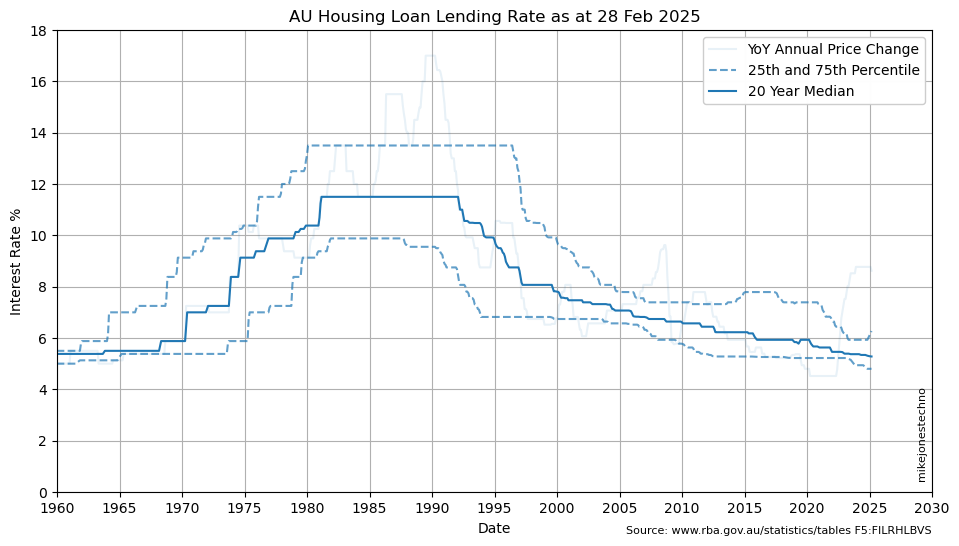

In [8]:
chart_params['color_index'] = 0
chart_params['legend_location'] = 'best'
percentile_chart = PercentileChart(percentiles.percentiles, percentiles.multi_years[3], **chart_params)
plt = percentile_chart.plot_percentiles(df) 
plt.show()

In [9]:
percentiles.display_percentile_summary(df_last_percentiles, 'interest rate')
percentiles.display_dataframe_table(df_last_percentiles)


Over the last 5 years the median (50th percetile) interest rate is 6.52%; The mean (average) interest rate is 6.51%.

Over the last 30 years the median (50th percetile) interest rate is 6.74%; The mean (average) interest rate is 6.86%.
    

Years,25th percentile,50th percentile,75th percentile,mean
1,8.77,8.77,8.77,8.76
5,4.52,6.52,8.66,6.51
10,4.80,5.28,6.39,5.90
20,5.28,6.22,7.79,6.54
30,5.76,6.74,7.79,6.86


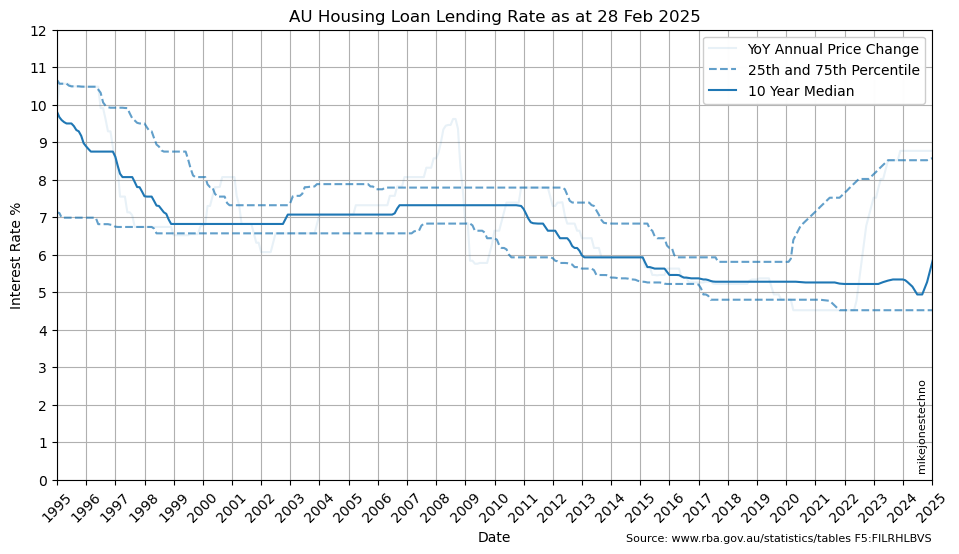

In [10]:
""" Change chart variables to plot from 1995"""

chart_params['start_year'] = 1995
chart_params['end_year'] = 2025 # set end year to multiple of old x_ticks before we change to 1 year ticks.
chart_params['y_ticks'] = 1
chart_params['x_ticks'] = 1
chart_params['top_limit'] = 12
chart_params['legend_location'] = 'upper right'

percentile_chart = PercentileChart(percentiles.percentiles, percentiles.multi_years[2], **chart_params)
plt = percentile_chart.plot_percentiles(df)
plt.show()

The chart shows interst rates have trended down from 7% to below 5% over the last 20 years.

> ℹ The data suggests reasonable confidence using baseline interest rates around 6% with reasonable uncertainty or risk that interest rates could peak higher.

In [11]:
%%capture
# Magic store dataframe to share with combo notebook
df_interest = df
%store df_interest